In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
df = pd.read_csv("heart.csv")
df.shape

(918, 12)

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
#### checking for variables with na
variables_with_na = [variables for variables in df.columns if df[variables].isnull().sum()>1]
for variables in variables_with_na:
    print(variables, df[variables].isnull().mean())

In [45]:
#### checking for numerical values
num_variables = [variables for variables in df.columns if df[variables].dtypes != 'O' and variables not in ['HeartDisease']]
print(len(num_variables))
df[num_variables].head()

6


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


In [46]:
#### checking for discrete variables
discrete_variables = [variables for variables in num_variables if len(df[variables].unique())<25]
print(discrete_variables)

['FastingBS']


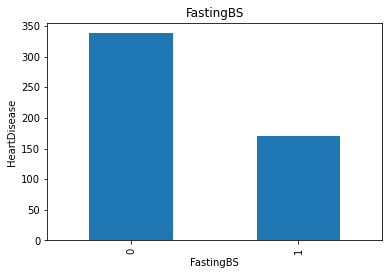

In [47]:
#### Relationship b/w taget and discrete variables
for variables in discrete_variables:
    data = df.copy()
    data.groupby(variables)['HeartDisease'].sum().plot.bar()
    plt.xlabel(variables)
    plt.ylabel('HeartDisease')
    plt.title(variables)
    plt.show()

In [48]:
#### Checking for continuous variables
cont_variable = [variables for variables in num_variables if variables not in discrete_variables]
cont_variable

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

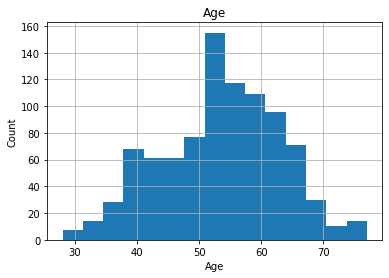

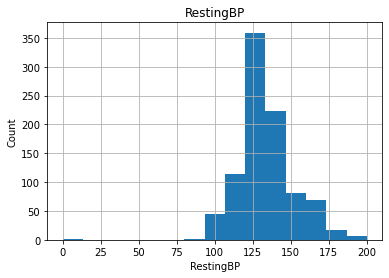

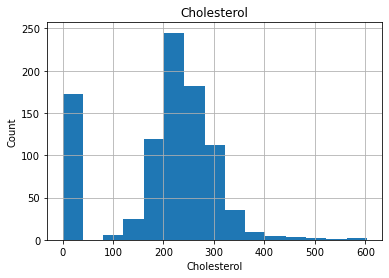

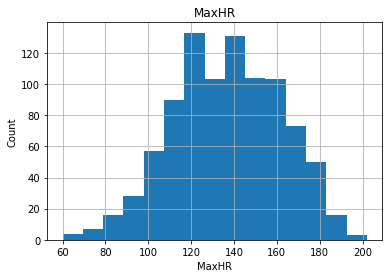

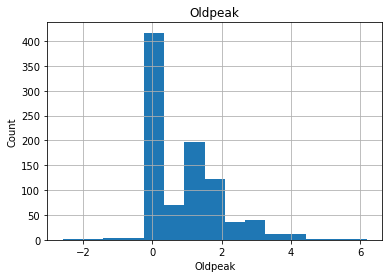

In [51]:
### Distributuion of Continuous variables
for variables in cont_variable:
    data = df.copy()
    #data[variables] = np.log(data[variables])
    data[variables].hist(bins=15)
    plt.xlabel(variables)
    plt.ylabel("Count")
    plt.title(variables)
    plt.show()

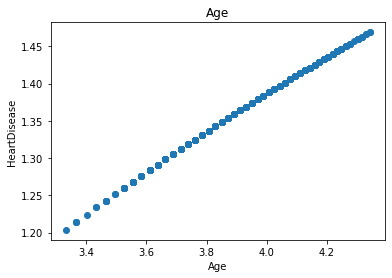

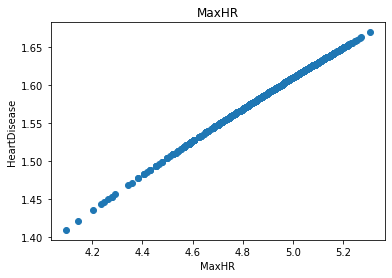

In [59]:
#### since the numerical variables are not normally distributed, we need to apply log transformation

for variables in cont_variable:
    data = df.copy()
    
    if 0 in data[variables].unique():
        pass
    else:
        data[variables] = np.log(data[variables])
        data['HeartDisease'] = np.log(data[variables])
        plt.scatter(data[variables], data['HeartDisease'])
        #data[variables].hist(bins=25)
        plt.xlabel(variables)
        plt.ylabel('HeartDisease')
        plt.title(variables)
        plt.show()

In [55]:
#### Checking for Categorical variables

cat_variables = [variables for variables in df.columns if df[variables].dtypes =='O']
print(cat_variables)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


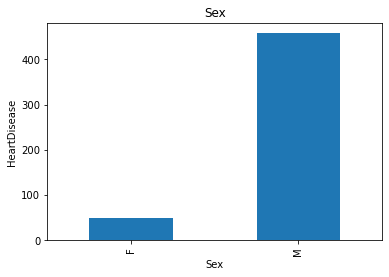

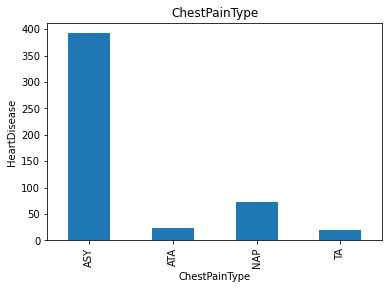

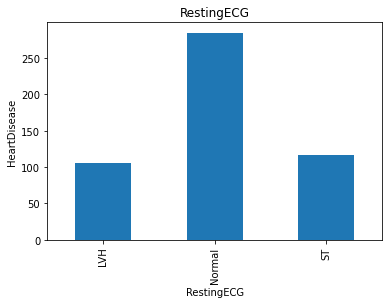

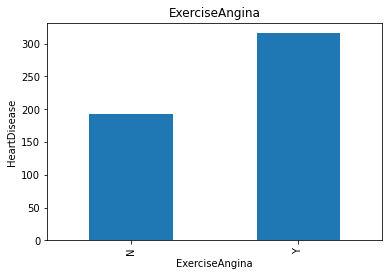

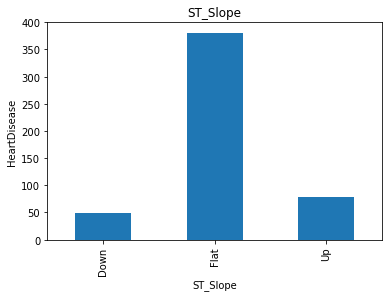

In [60]:
#### Finding the relationship b/w categorical and target variables
for variables in cat_variables:
    data = df.copy()
    data.groupby(variables)['HeartDisease'].sum().plot.bar()
    plt.xlabel(variables)
    plt.ylabel('HeartDisease')
    plt.title(variables)
    plt.show()

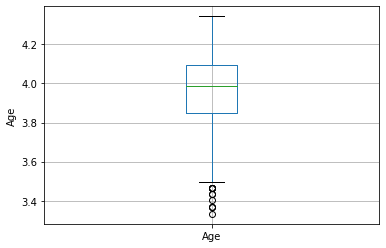

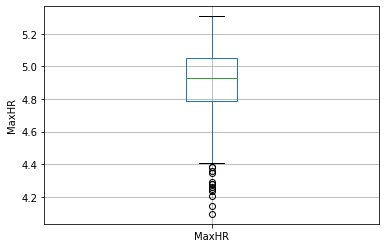

In [61]:
#### Outliers Detection

for variables in cont_variable:
    data = df.copy()
    
    if 0 in data[variables].unique():
        pass
    else:
        data[variables] = np.log(data[variables])
        data.boxplot(column = variables)
        plt.ylabel(variables)
        plt.show()

In [66]:

log_tran = ['Age', 'MaxHR']

for variables in log_tran:
    df[variables] = np.log(df[variables])

In [68]:

for variables in cat_variables:
    temp=df.groupby(variables)['HeartDisease'].count()/len(df)
    print(temp)
    temp_df=temp[temp>0.01].index
    print(temp_df)
    df[variables]=np.where(df[variables].isin(temp_df),df[variables],'Rare_var')

Sex
F    0.21024
M    0.78976
Name: HeartDisease, dtype: float64
Index(['F', 'M'], dtype='object', name='Sex')
ChestPainType
ASY    0.540305
ATA    0.188453
NAP    0.221133
TA     0.050109
Name: HeartDisease, dtype: float64
Index(['ASY', 'ATA', 'NAP', 'TA'], dtype='object', name='ChestPainType')
RestingECG
LVH       0.204793
Normal    0.601307
ST        0.193900
Name: HeartDisease, dtype: float64
Index(['LVH', 'Normal', 'ST'], dtype='object', name='RestingECG')
ExerciseAngina
N    0.595861
Y    0.404139
Name: HeartDisease, dtype: float64
Index(['N', 'Y'], dtype='object', name='ExerciseAngina')
ST_Slope
Down    0.068627
Flat    0.501089
Up      0.430283
Name: HeartDisease, dtype: float64
Index(['Down', 'Flat', 'Up'], dtype='object', name='ST_Slope')


In [74]:

df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [81]:
#### Transforming categorical variables so it can be scaled

for variables in cat_variables:
    labels_ordered=df.groupby([variables])['HeartDisease'].count().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[variables]=df[variables].map(labels_ordered)

In [82]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,3.688879,1,1,140,289,0,2,5.147494,1,0.0,1,0
1,3.891820,0,2,160,180,0,2,5.049856,1,1.0,2,1
2,3.610918,1,1,130,283,0,0,4.584967,1,0.0,1,0
3,3.871201,0,3,138,214,0,2,4.682131,0,1.5,2,1
4,3.988984,1,2,150,195,0,2,4.804021,1,0.0,1,0


In [83]:
#### Since the data is in different units/scales, we need to scale it

scaling_variables=[variables for variables in df.columns if variables not in ['HeartDisease'] ]
len(scaling_variables)

11

In [84]:
#### Since the data is in different units,, we need to scale our data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[scaling_variables])

MinMaxScaler()

In [85]:
scaled_data = pd.DataFrame(scaler.fit_transform(df[scaling_variables]),columns=scaling_variables)
scaled_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.352585,1.0,0.333333,0.70,0.479270,0.0,1.0,0.867559,1.0,0.295455,0.5
1,0.553198,0.0,0.666667,0.80,0.298507,0.0,1.0,0.787127,1.0,0.409091,1.0
2,0.275517,1.0,0.333333,0.65,0.469320,0.0,0.0,0.404163,1.0,0.295455,0.5
3,0.532815,0.0,1.000000,0.69,0.354892,0.0,1.0,0.484204,0.0,0.465909,1.0
4,0.649248,1.0,0.666667,0.75,0.323383,0.0,1.0,0.584614,1.0,0.295455,0.5


In [88]:
df1 = pd.concat([scaled_data,df['HeartDisease'].reset_index(drop=True)],axis=1)
df1.to_csv('Cleaned_data.csv')

In [91]:
#### Correlation check
pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = df1.corr()
corr_matrix

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.00,0.06,0.18,0.25,-0.09,0.20,-0.21,-0.37,-0.22,0.26,0.10,0.28
Sex,0.06,1.00,0.17,0.01,-0.20,0.12,-0.04,-0.19,-0.19,0.11,0.07,0.31
ChestPainType,0.18,0.17,1.00,0.02,-0.14,0.12,-0.07,-0.33,-0.42,0.25,0.20,0.47
RestingBP,0.25,0.01,0.02,1.00,0.10,0.07,-0.12,-0.11,-0.16,0.16,0.08,0.11
Cholesterol,-0.09,-0.20,-0.14,0.10,1.00,-0.26,0.04,0.24,0.03,0.05,-0.01,-0.23
FastingBS,0.20,0.12,0.12,0.07,-0.26,1.00,-0.12,-0.13,-0.06,0.05,0.04,0.27
RestingECG,-0.21,-0.04,-0.07,-0.12,0.04,-0.12,1.00,0.08,0.10,-0.10,-0.02,-0.11
MaxHR,-0.37,-0.19,-0.33,-0.11,0.24,-0.13,0.08,1.00,0.35,-0.14,-0.24,-0.39
ExerciseAngina,-0.22,-0.19,-0.42,-0.16,0.03,-0.06,0.10,0.35,1.00,-0.41,-0.25,-0.49
Oldpeak,0.26,0.11,0.25,0.16,0.05,0.05,-0.10,-0.14,-0.41,1.00,0.10,0.40


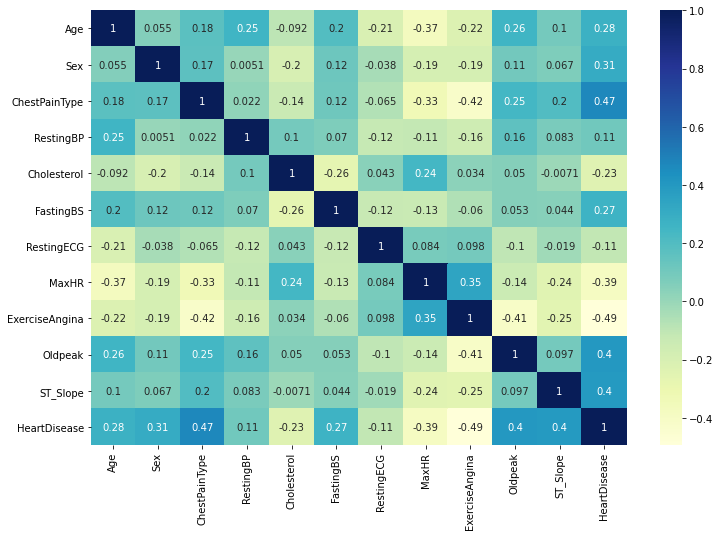

In [92]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

In [127]:
#### Using SelectFromModel, we will only select the important variables that explains our target  variable

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [97]:
X = df1[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y = df1['HeartDisease']

In [131]:
sel_from_model = SelectFromModel(Lasso(alpha=0.05,random_state=12))
sel_from_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=12))

In [135]:
selected_feat = X_train.columns[(sel_from_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_from_model.estimator_.coef_ == 0)))

total features: 11
selected features: 5
features with coefficients shrank to zero: 6


In [136]:
selected_feat

Index(['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [138]:
X_train = df1[['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope']]

In [139]:
#### Splitting our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 12)

In [169]:
#### Applying Logistic Reg
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score,recall_score,f1_score

In [164]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [165]:
y_pred = model1.predict(X_test)
y_train_predict = model1.predict(X_train)

In [170]:
#### Checking all the relevant scores
print("Accuracy Score of Model1_train : ", accuracy_score(y_train,y_train_predict))
print("Accuracy Score of Model1_test : ", accuracy_score(y_test,y_pred))
print("precision Score of Model1 : ", precision_score(y_test,y_pred))
print("recall Score of Model1 : ", recall_score(y_test,y_pred))
print("F1 Score of Model1 : ", f1_score(y_test,y_pred))

Accuracy Score of Model1_train :  0.8613707165109035
Accuracy Score of Model1_test :  0.855072463768116
precision Score of Model1 :  0.8589743589743589
recall Score of Model1 :  0.881578947368421
F1 Score of Model1 :  0.8701298701298701


In [144]:
ytrain_pred = model1.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = model1.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9179991356957649
RF test roc-auc: 0.9159061969439729


In [146]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
y_train_predict = rf_model.predict(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
y_pred = rf_model.predict(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.941983234295416


In [147]:
print("Accuracy Score of Model1_train : ", accuracy_score(y_train,y_train_predict))
print("Accuracy Score of Model1_test : ", accuracy_score(y_test,y_pred))
print("precision Score of Model1 : ", precision_score(y_test,y_pred))
print("recall Score of Model1 : ", recall_score(y_test,y_pred))

Accuracy Score of Model1_train :  1.0
Accuracy Score of Model1_test :  0.8659420289855072
precision Score of Model1 :  0.8807947019867549
recall Score of Model1 :  0.875


In [150]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
y_train_predict = ada_classifier.predict(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
y_pred = ada_classifier.predict(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9614893533432859
Adaboost test roc-auc: 0.9179488539898132


In [151]:
print("Accuracy Score of Model1_train : ", accuracy_score(y_train,y_train_predict))
print("Accuracy Score of Model1_test : ", accuracy_score(y_test,y_pred))
print("precision Score of Model1 : ", precision_score(y_test,y_pred))
print("recall Score of Model1 : ", recall_score(y_test,y_pred))

Accuracy Score of Model1_train :  0.8894080996884736
Accuracy Score of Model1_test :  0.8659420289855072
precision Score of Model1 :  0.9020979020979021
recall Score of Model1 :  0.8486842105263158


In [152]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
y_train_predict = knn_classifier.predict(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
y_pred = knn_classifier.predict(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9632179618134674
Adaboost test roc-auc: 0.8776793293718167


In [153]:
print("Accuracy Score of Model1_train : ", accuracy_score(y_train,y_train_predict))
print("Accuracy Score of Model1_test : ", accuracy_score(y_test,y_pred))
print("precision Score of Model1 : ", precision_score(y_test,y_pred))
print("recall Score of Model1 : ", recall_score(y_test,y_pred))

Accuracy Score of Model1_train :  0.897196261682243
Accuracy Score of Model1_test :  0.8115942028985508
precision Score of Model1 :  0.8472222222222222
recall Score of Model1 :  0.8026315789473685


In [154]:
pred=[]
for model in [rf_model,model1,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9278968590831919


In [155]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.84,0.77,0.49,0.40
1,0.00,0.08,0.48,0.00
2,0.93,0.97,0.51,1.00
3,0.94,0.93,0.53,1.00
4,0.95,0.97,0.52,1.00
...,...,...,...,...
271,0.97,0.94,0.53,1.00
272,0.06,0.03,0.48,0.00
273,0.29,0.28,0.49,0.00
274,0.00,0.09,0.48,0.00


In [156]:
final_prediction

0     0.63
1     0.14
2     0.85
3     0.85
4     0.86
      ... 
271   0.86
272   0.14
273   0.26
274   0.14
275   0.15
Length: 276, dtype: float64

In [163]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.87981198, 0.87981198, 0.8503526 , 0.84989805, 0.83404163,
       0.82994646, 0.82984612, 0.82694194, 0.71892054, 0.71326293,
       0.7104811 , 0.71024763, 0.70549309, 0.70129247, 0.69736827,
       0.69468047, 0.68847392, 0.68639953, 0.68000858, 0.67835399,
       0.66489083, 0.66412044, 0.64819905, 0.64457515, 0.60569748,
       0.60509641, 0.57548439, 0.57507758, 0.54466033, 0.53380733,
       0.51602804, 0.5159775 , 0.51240097, 0.5099496 , 0.48274729,
       0.46743438, 0.45369643, 0.44033096, 0.4309901 , 0.43050855,
       0.42521943, 0.42256294, 0.41659647, 0.40868226, 0.40865622,
       0.40218806, 0.3999856 , 0.38251949, 0.36095611, 0.35605486,
       0.3362687 , 0.2733399 , 0.27254092, 0.25953776, 0.25882013,
       0.21335515, 0.20049396, 0.17380354, 0.17369239, 0.12366985])

In [158]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
50,0.34,0.86
49,0.36,0.86
48,0.36,0.86
31,0.52,0.86
33,0.51,0.86


In [159]:
accuracy_ls

,thresholds,accuracy
50,0.34,0.86
49,0.36,0.86
48,0.36,0.86
31,0.52,0.86
33,0.51,0.86
34,0.48,0.86
30,0.52,0.86
32,0.51,0.86
35,0.47,0.86
41,0.42,0.86


In [160]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

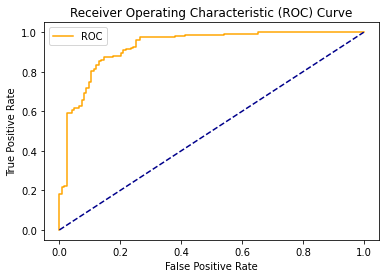

In [161]:
plot_roc_curve(fpr,tpr)